In [10]:
import numpy as np
import pandas as pd
from sklearn import *

In [13]:
df_o = pd.read_csv('C:\\Users\\prane\\PycharmProjects\\hacktj\\data2.csv')
df = df_o.copy()

In [14]:
# reduce skew
# area = df['area'].apply(lambda x: np.log(x + np.sqrt(x**2 + 1)))
df['CLASS'] = df_o['CLASS'].apply(lambda x: 0 if x == "no_fire" else 1)
df['CLASS']

0       0
1       0
2       1
3       0
4       0
       ..
1708    0
1709    0
1710    1
1711    0
1712    1
Name: CLASS, Length: 1713, dtype: int64

(array([  6.,  12.,   3.,   5.,  40., 249., 482., 575., 307.,  34.]),
 array([0.030735 , 0.1058338, 0.1809326, 0.2560314, 0.3311302, 0.406229 ,
        0.4813278, 0.5564266, 0.6315254, 0.7066242, 0.781723 ]),
 <BarContainer object of 10 artists>)

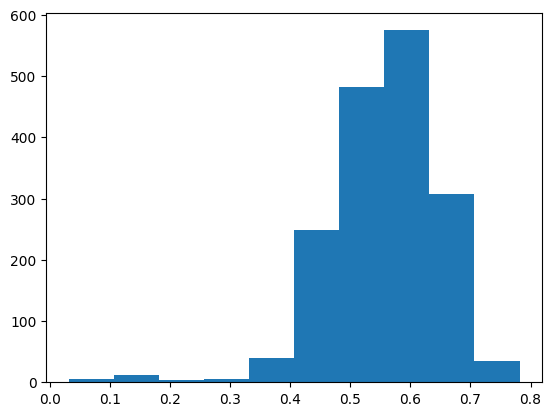

In [15]:
from matplotlib import pyplot as plt

plt.hist(df['NDVI'])

(array([  5.,   6.,  56., 100., 219., 427., 457., 321.,  97.,  25.]),
 array([13137.       , 13384.4570513, 13631.9141026, 13879.3711539,
        14126.8282052, 14374.2852565, 14621.7423078, 14869.1993591,
        15116.6564104, 15364.1134617, 15611.570513 ]),
 <BarContainer object of 10 artists>)

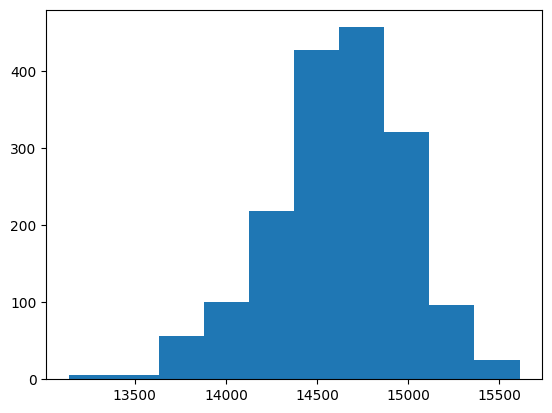

In [16]:
plt.hist(df['LST'])

(array([1.210e+02, 1.400e+02, 4.100e+02, 1.022e+03, 9.000e+00, 3.000e+00,
        5.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <BarContainer object of 10 artists>)

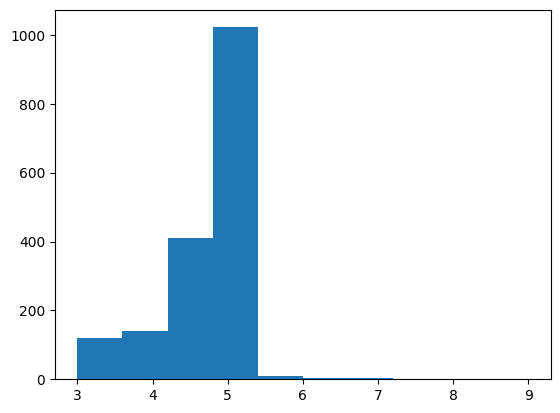

In [17]:
plt.hist(df['BURNED_AREA'])

In [18]:
classification = df['CLASS']

In [32]:
TEST = []
for i in range(9):
    i = i + 1
    TEST2 = []

    parameters = df.drop('CLASS', axis=1)
    train_parameters, test_parameters, train_solutions, test_solutions = model_selection.train_test_split(parameters, classification, train_size=i/10)

    rf = naive_bayes.GaussianNB()
    rf.fit(train_parameters, train_solutions)
    TEST2.append(metrics.accuracy_score(test_solutions, rf.predict(test_parameters)))

    rf = tree.DecisionTreeClassifier()
    rf.fit(train_parameters, train_solutions)
    TEST2.append(metrics.accuracy_score(test_solutions, rf.predict(test_parameters)))

    rf = svm.SVC()
    rf.fit(train_parameters, train_solutions)
    TEST2.append(metrics.accuracy_score(test_solutions, rf.predict(test_parameters)))

    rf = linear_model.LogisticRegression()
    rf.fit(train_parameters, train_solutions)
    TEST2.append(metrics.accuracy_score(test_solutions, rf.predict(test_parameters)))

    # Create a Random Forest classifier model
    rf = ensemble.RandomForestClassifier(n_estimators=101, random_state=42)
    rf.fit(train_parameters, train_solutions)
    TEST2.append(metrics.accuracy_score(test_solutions, rf.predict(test_parameters)))

    TEST.append(TEST2)

In [34]:
TEST

[[0.7652399481193255,
  0.6757457846952011,
  0.7801556420233463,
  0.7801556420233463,
  0.7380025940337225],
 [0.775346462436178,
  0.7534646243617797,
  0.7716994894237783,
  0.7731582786287381,
  0.7950401167031363],
 [0.7683333333333333, 0.7425, 0.7866666666666666, 0.7866666666666666, 0.7975],
 [0.7772373540856031,
  0.7568093385214008,
  0.7704280155642024,
  0.7704280155642024,
  0.791828793774319],
 [0.7689614935822637,
  0.7712952158693116,
  0.764294049008168,
  0.764294049008168,
  0.8121353558926487],
 [0.7813411078717201,
  0.782798833819242,
  0.7755102040816326,
  0.7755102040816326,
  0.8177842565597667],
 [0.7704280155642024,
  0.7782101167315175,
  0.7684824902723736,
  0.7684824902723736,
  0.8326848249027238],
 [0.7813411078717201,
  0.8104956268221575,
  0.8017492711370262,
  0.8017492711370262,
  0.8367346938775511],
 [0.7674418604651163,
  0.7732558139534884,
  0.7616279069767442,
  0.7616279069767442,
  0.8313953488372093]]

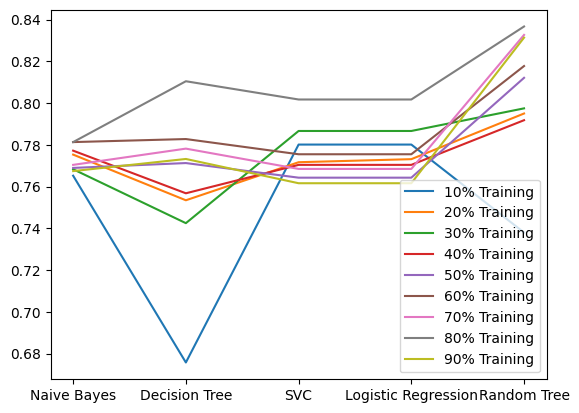

In [43]:
# TESTT = np.linalg.inv(np.array(TEST))
labels = label=["Naive Bayes", "Decision Tree", "SVC", "Logistic Regression", "Random Tree"]
plt.plot(label, TEST[0], label="10% Training")
plt.plot(label, TEST[1], label="20% Training")
plt.plot(label, TEST[2], label="30% Training")
plt.plot(label, TEST[3], label="40% Training")
plt.plot(label, TEST[4], label="50% Training")
plt.plot(label, TEST[5], label="60% Training")
plt.plot(label, TEST[6], label="70% Training")
plt.plot(label, TEST[7], label="80% Training")
plt.plot(label, TEST[8], label="90% Training")
# plt.plot(label, TEST[9], label="100% Training")
plt.legend()



Accuracy: 0.7972027972027972


Accuracy: 0.8041958041958042


Accuracy: 0.8041958041958042


Accuracy: 0.8508158508158508
